# Exploratory Data Analysis
Find relationships in the data between the columns

## 1. STARTING AND FINISHING

Firsly let's have a look at the dependency between qualifying and race finishing positions. You can imagine that the higher you qualify the higher the chance of finishing top.

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

It appears there is a starting grid position 0. This seems to indicate pit-lane start or a DNQ (so no race participation), not an ordinary grid start.

In [23]:
results = pd.read_csv('f1_dataset/results_fixed.csv')
zero_grid = results.loc[results['grid'] == 0]
zero_grid.head(5)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
2281,2281,2282,127,62,18,22,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77
2432,2432,2433,134,49,21,20,0,-1,F,20,0.0,0,\N,\N,\N,\N,\N,\N,81
2433,2433,2434,134,59,21,21,0,-1,F,21,0.0,0,\N,\N,\N,\N,\N,\N,81
2434,2434,2435,134,21,17,9,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,82
2797,2797,2798,151,58,18,20,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77


In [25]:
start_finish = results.drop(results[results.grid == 0].index)
start_finish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24464 entries, 0 to 26079
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24464 non-null  int64  
 1   resultId         24464 non-null  int64  
 2   raceId           24464 non-null  int64  
 3   driverId         24464 non-null  int64  
 4   constructorId    24464 non-null  int64  
 5   number           24464 non-null  object 
 6   grid             24464 non-null  int64  
 7   position         24464 non-null  int64  
 8   positionText     24464 non-null  object 
 9   positionOrder    24464 non-null  int64  
 10  points           24464 non-null  float64
 11  laps             24464 non-null  int64  
 12  time             24464 non-null  object 
 13  milliseconds     24464 non-null  object 
 14  fastestLap       24464 non-null  object 
 15  rank             24464 non-null  object 
 16  fastestLapTime   24464 non-null  object 
 17  fastestLapSpeed  

**Insight 1:**
The most probable outcome is that a driver starting on pole will finish first. This has happened 464 times in the dataset, or 1.897% of all driver outcomes result in pole-to-win conversion.

**Insight 2:**
Drivers starting at the back are extremely likely to not finish the race. About 15% of all the results comes from drivers who started in the second half and DNFd.

In [51]:
start_finish_grouped = start_finish.groupby(['grid','position']).size().reset_index(name='count')
start_finish_grouped['percentage'] = start_finish_grouped['count'].div(start_finish_grouped['count'].sum()/100)
start_finish_grouped.sort_values(by='count',ascending=False).head(10)

,grid,position,count,percentage
1,1,1,464,1.896664
339,17,-1,446,1.823087
292,15,-1,437,1.786298
269,14,-1,435,1.778123
361,18,-1,434,1.774035
406,20,-1,428,1.749509
246,13,-1,427,1.745422
316,16,-1,427,1.745422
182,10,-1,424,1.733159
384,19,-1,423,1.729071


In [101]:
# to plot the data as a heat map we need to pivot the three columns into a 2D matrix
pivoted = start_finish_grouped.pivot(index='position', columns='grid', values='count')
# then caluctae percetage likelihood of a finishing position for each starting grid (i.e. go by columns)
pivoted = pivoted.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))
pivoted.head()

grid,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
position,,,,,,,,,,,,,,,,,,,,,
-1,23.68,24.91,27.28,29.78,32.88,33.55,33.61,34.52,34.61,38.69,...,55.48,60.48,69.57,53.33,60.0,73.68,50.00,35.29,23.08,100.0
1,42.11,23.72,12.23,6.01,4.37,3.57,2.09,1.55,0.46,1.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.16,20.51,18.25,13.84,8.56,6.51,4.81,3.29,3.37,1.64,...,0.33,NaN,NaN,NaN,NaN,NaN,NaN,5.88,NaN,NaN
3,6.72,10.99,15.97,13.93,11.93,8.62,6.36,5.39,4.74,3.10,...,NaN,1.21,NaN,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4.26,5.31,8.30,11.66,12.39,9.90,7.27,7.95,7.38,4.01,...,NaN,0.81,NaN,NaN,NaN,NaN,5.56,NaN,7.69,NaN


(0.0, 25.0)

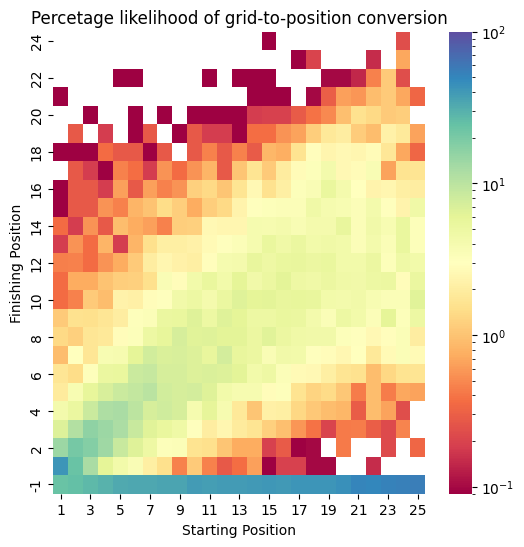

In [109]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=pivoted, annot=annot,cmap=cmap,vmin = 0, vmax=50, norm=LogNorm())
plt.ylabel('Finishing Position')
plt.xlabel('Starting Position')
plt.title('Percentage likelihood of grid-to-position conversion')
plt.xlim([0,25])
plt.ylim([0, 25])


In the event that the driver does finish the race - DNF excluding - what is the most likely position for each starting grid for all drivers.

/var/folders/4z/0b31nkj9457081mx9h796b240000gn/T/ipykernel_91968/777083655.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})


Text(0.5, 1.0, 'Most likely finishing position for each grid start. Correlation = 0.86')

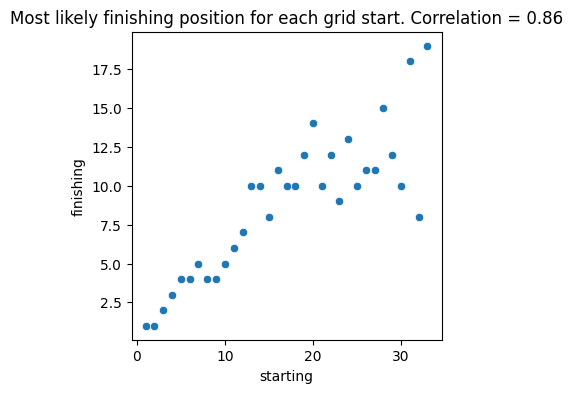

In [127]:
# dropping label -1 and finidng most common
a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})
corr = a.corr()
corr_num = corr['starting'].iloc[1]
plt.figure(figsize=(4,4))
sns.scatterplot(data = a, x = 'starting', y = 'finishing')
plt.title('Most likely finishing position for each grid start. Correlation = {}'.format(round(corr_num,2)))


## 2. CHAMPIONSHIP WINNING PATTERN
Looking at how has the championship winning driver performed in his championship winning season and the season after.
From each season pull out the quali and finishing positions for the championship winner


In [138]:
# this dataframe will hold info about race order in any given season
races = pd.read_csv('f1_dataset/races.csv')
# this dataframe will hold info about the championship winner
driver_stand = pd.read_csv('f1_dataset/driver_standings.csv')
# will also resue the previous results dataframe to find starting and finishing positions

### for each year find the winner

In [171]:
# merge race data with point scorers
races_points = pd.merge(races, driver_stand, how='left', left_on = ['raceId'], right_on = ['raceId'])
# group by years and get max value of points
# here we make an assumption that you cannot get negative points and that raceId go up with actual round numbers
# because we select max points and max raceId, we assume that driver winning the championship has maximum points on their last race
# if negative points were possible, he could have max points on an earlier race
grouped_year_raceid = races_points.groupby(['year'])[['points','raceId']].max().reset_index().rename(columns={'points':'maxPoints'})
season_winner = pd.merge(grouped_year_raceid,driver_stand,how='left', left_on = ['raceId','maxPoints'], right_on = ['raceId','points'])
# manually add Max as the winner of the 2023 season
season_winner.loc[73,'driverId'] = 830
season_winner.head(10)

,year,maxPoints,raceId,round,driverStandingsId,driverId,points,position,positionText,wins
0,1950,30.0,839,7,43539.0,642.0,30.0,1.0,1,3.0
1,1951,31.0,832,8,44049.0,579.0,31.0,1.0,1,3.0
2,1952,36.0,824,8,44669.0,647.0,36.0,1.0,1,6.0
3,1953,34.5,816,9,45286.0,647.0,34.5,1.0,1,5.0
4,1954,42.0,807,9,52049.0,579.0,42.0,1.0,1,6.0
5,1955,40.0,798,7,46422.0,579.0,40.0,1.0,1,4.0
6,1956,30.0,791,8,46912.0,579.0,30.0,1.0,1,3.0
7,1957,40.0,783,8,47372.0,579.0,40.0,1.0,1,4.0
8,1958,42.0,775,11,49585.0,578.0,42.0,1.0,1,1.0
9,1959,31.0,764,9,62485.0,356.0,31.0,1.0,1,2.0


### find winner's quali/win performance
for each winner find their quali and race positions for every race
year, driverId, round number, quali, finishing

In [172]:
dated_results = pd.merge(results, races[['raceId','year','round']], how='left',left_on = 'raceId', right_on = 'raceId')
winner_results = pd.merge(season_winner[['year', 'driverId', 'maxPoints']], dated_results[['driverId', 'raceId', 'grid', 'position', 'year','round']], how='left', left_on=['year','driverId'], right_on=['year','driverId'])
winner_results.head(10)

,year,driverId,maxPoints,raceId,grid,position,round
0,1950,642.0,30.0,833,1,1,1
1,1950,642.0,30.0,834,2,-1,2
2,1950,642.0,30.0,836,2,1,4
3,1950,642.0,30.0,837,1,4,5
4,1950,642.0,30.0,838,2,7,6
5,1950,642.0,30.0,839,3,1,7
6,1951,579.0,31.0,825,1,1,1
7,1951,579.0,31.0,827,1,9,3
8,1951,579.0,31.0,828,1,11,4
9,1951,579.0,31.0,829,2,2,5


Text(40.162083333333335, 0.5, 'Position')

<Figure size 500x500 with 0 Axes>

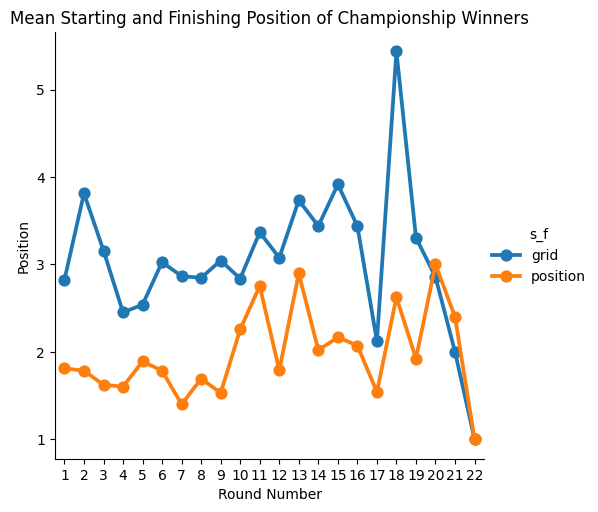

In [182]:
mean_per_round = winner_results[['round','grid','position']].groupby('round').mean().reset_index()
mean_per_round = mean_per_round.melt('round', var_name='s_f', value_name='pos')
mean_per_round.head(10)
plt.figure(figsize=(5,5))
sns.catplot(data = mean_per_round, x = 'round', y = 'pos', hue='s_f', kind='point')
plt.title('Mean Starting and Finishing Position of Championship Winners')
plt.xlabel('Round Number')
plt.ylabel('Position')

## 3. MOST DIFFICULT TO OVERTAKE TRACKS
We have the lap times data which we originally discared. We can use it to figure out how many overtakes on average happen on any track type.

In [208]:
laps = pd.read_csv('f1_dataset/lap_times.csv')
circuits = pd.read_csv('f1_dataset/circuits.csv')
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


For every driver in every race, check how many times they change position. Sum them up. Since it takes two drivers to swap a postion (most often), divide the whole count by 2.


Text(0, 0.5, 'Normalised Overtakes')

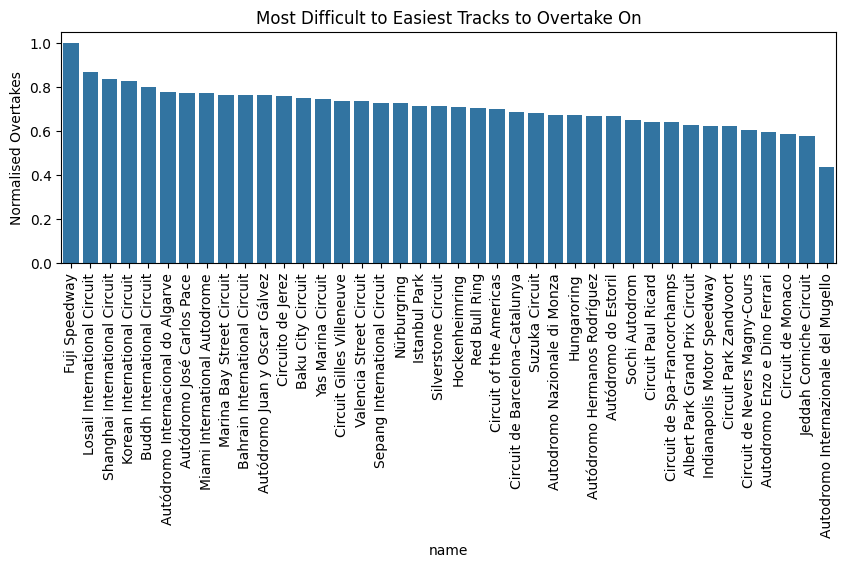

In [221]:
pos_changes = laps[['raceId','driverId','position']].groupby(['raceId','driverId']).nunique().reset_index()
total_overtakes = pos_changes[['raceId','position']].groupby(['raceId']).sum().reset_index().rename(columns={'position': 'overtakes'})
overtakes_circuit = pd.merge(total_overtakes, races[['raceId','circuitId']], how='left', left_on='raceId', right_on='raceId')
overtakes_per_circuit = overtakes_circuit[['circuitId','overtakes']].groupby('circuitId').mean().reset_index()
overtakes_per_circuit_named = pd.merge(overtakes_per_circuit, circuits[['circuitId','name']],how='left',left_on='circuitId',right_on='circuitId').sort_values('overtakes', ascending=False)
overtakes_per_circuit_named['norm_overtakes'] = overtakes_per_circuit_named['overtakes'].div(overtakes_per_circuit_named['overtakes'].max())
plt.figure(figsize=(10,3))
sns.barplot(data = overtakes_per_circuit_named, x='name', y='norm_overtakes')
plt.xticks(rotation=90)
plt.title('Most Difficult to Easiest Tracks to Overtake On')
plt.ylabel('Normalised Overtakes')
# overtakes_per_circuit_named.head(10)

In [222]:
# save difficulty of the track
circuit_diff = pd.merge(circuits,overtakes_per_circuit_named,how='left',left_on='circuitId',right_on='circuitId')
circuit_diff.to_csv('f1_dataset/circuits_more.csv')

## 4. DOES AGE MATTER
Lets look at age/quali/finishing position distribution

In [224]:
drivers = pd.read_csv('f1_dataset/drivers.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [228]:
drivers['dob'] = pd.to_datetime(drivers['dob'])
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverId     857 non-null    int64         
 1   driverRef    857 non-null    object        
 2   number       857 non-null    object        
 3   code         857 non-null    object        
 4   forename     857 non-null    object        
 5   surname      857 non-null    object        
 6   dob          857 non-null    datetime64[ns]
 7   nationality  857 non-null    object        
 8   url          857 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 60.4+ KB


Find age of the drivers for every race. Then pivot the table to show normalised counts for each combo of driver age and starting position.

In [244]:
dated_races = pd.merge(races[['raceId','year']], results[['raceId','driverId','grid','position']], how='left',left_on='raceId',right_on='raceId')
age_position = pd.merge(dated_races[['driverId','year','grid','position']], drivers[['driverId','dob']], how='left',left_on='driverId',right_on='driverId')
age_position['dob_year'] = age_position['dob'].dt.year
age_position['age'] = age_position['year'] - age_position['dob_year']
age_grid_count = age_position[['grid','age']].groupby(['grid','age']).value_counts().reset_index()
age_grid_count = age_grid_count.pivot(index='grid', columns='age', values='count')
age_grid_count = age_grid_count.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))

Text(0.5, 1.0, 'Age vs Starting Grid Distribution')

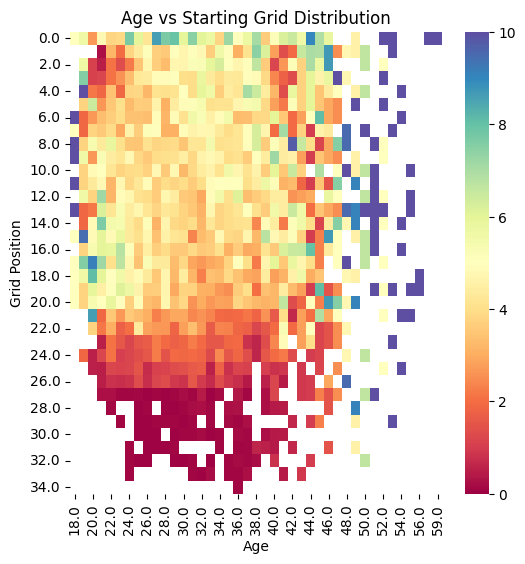

In [253]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=age_grid_count, annot=annot,cmap=cmap,vmin = 0, vmax = 10)
plt.ylabel('Grid Position')
plt.xlabel('Age')
plt.title('Age vs Starting Grid Distribution')

Reapeat the same for finishing position.

In [250]:
age_finish_count = age_position[['position','age']].groupby(['position','age']).value_counts().reset_index()
age_finish_count = age_finish_count.pivot(index='position', columns='age', values='count')
age_finish_count = age_finish_count.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))

Text(0.5, 1.0, 'Age vs Finish Distribution')

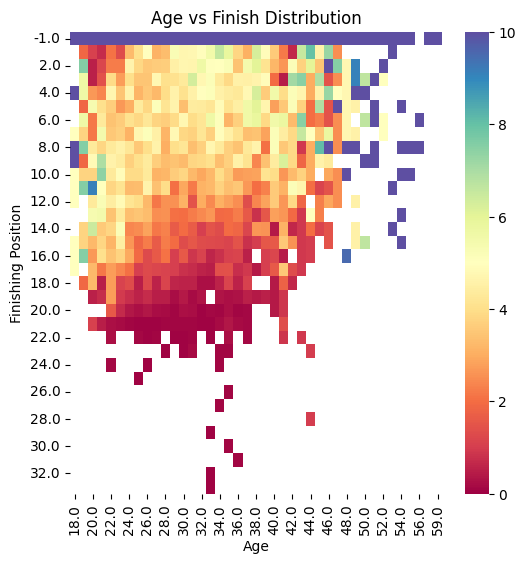

In [254]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=age_finish_count, annot=annot,cmap=cmap,vmin = 0, vmax = 10)
plt.ylabel('Finishing Position')
plt.xlabel('Age')
plt.title('Age vs Finish Distribution')

**Insight** Visual inspection seems to indicate that age does not matter. In both graphs we see a fairly uniform distribution of age and starting/finishing position.